<a href="https://colab.research.google.com/github/pablomerizalde/CO0371-Analitica-de-negocios/blob/main/Bayes/02%20-%20bayes%20gaussiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo Naive Bayes**
0. Se cargan las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd

#Esto es para el modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

1. Cargar la base de datos

In [ ]:
#nxl='./../datos/0. SolicitantesCrédito(USD).xlsx'
nxl= 'https://raw.githubusercontent.com/pablomerizalde/CO0371-Analitica-de-negocios/main/datos/0.%20SolicitantesCr%C3%A9dito(USD).xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
XDB=XDB.dropna()

#Seleccionamos las variables de interes
XD=XDB[['Edad','Ingresos','Egresos','Monto (EAD)']]
yd=XDB[['PreApr']]  #Variable Deseada Clasificación
XD.head(100) #Si se quieren ver las primeras 100 filas

,Edad,Ingresos,Egresos,Monto (EAD)
0,38,1356.14400,1685.622667,625.562230
1,51,286.01600,364.462000,140.031984
2,37,517.46325,629.208889,284.564492
3,29,473.27000,551.616889,309.647588
4,42,750.09175,806.715778,500.663578
...,...,...,...,...
95,50,1060.30125,811.605556,737.417739
96,62,29.05375,16.878667,41.842492
97,54,760.35500,975.194222,212.474119
98,54,61.62625,52.017333,48.452807


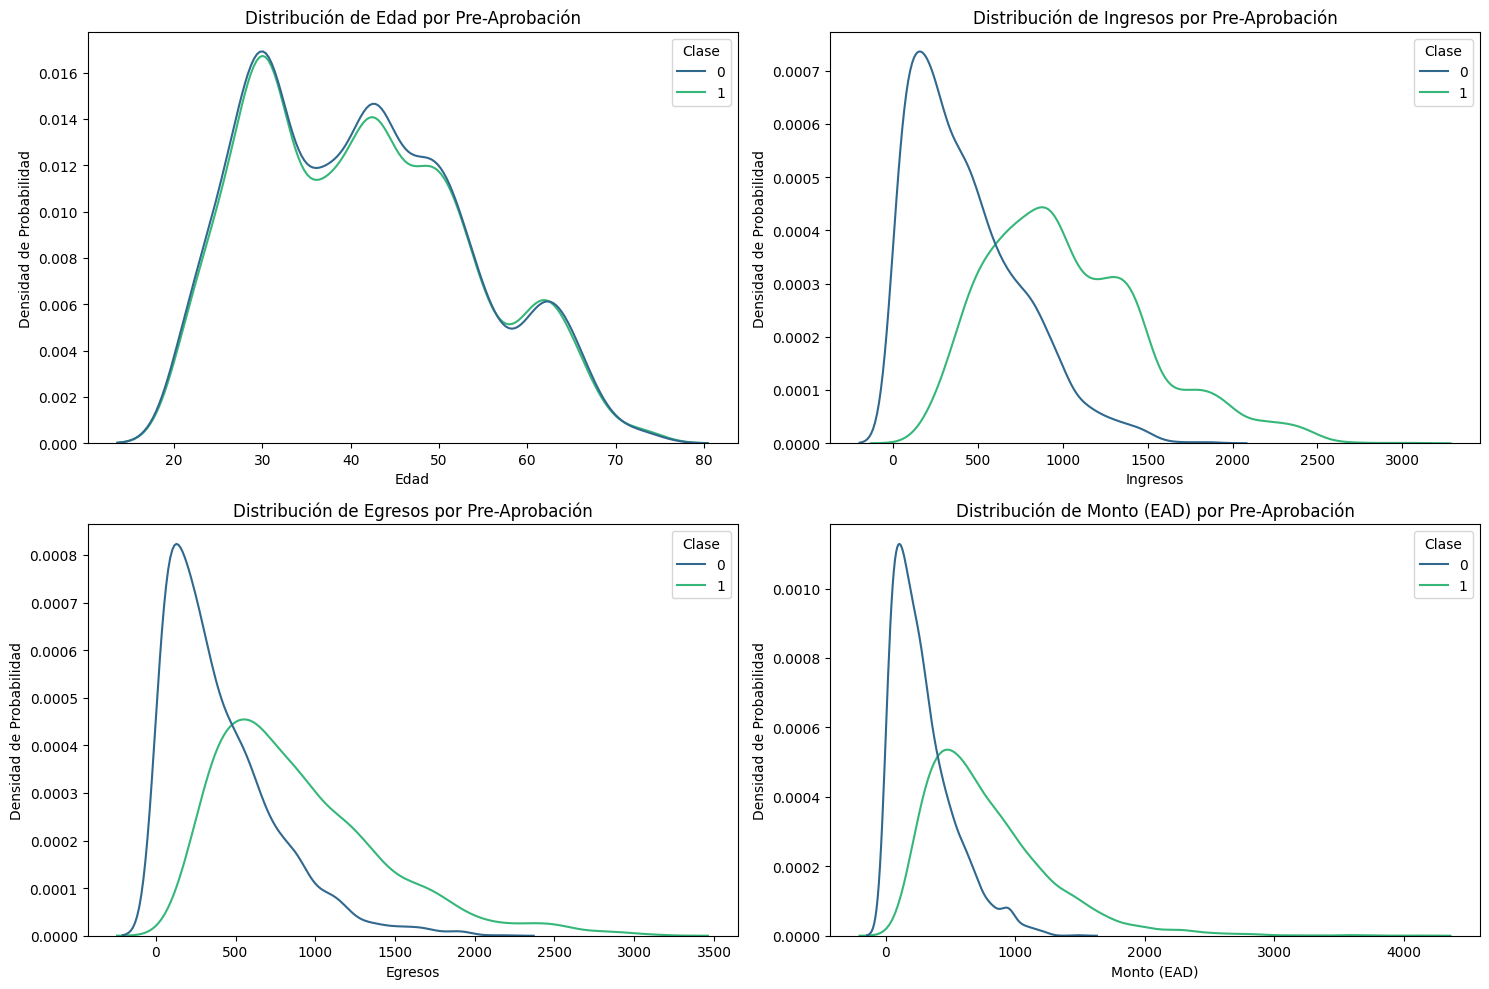

In [ ]:
df_plot = XD.copy()
df_plot['Clase'] = yd.values

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() # Aplanamos para iterar fácilmente

columnas = XD.columns

for i, col in enumerate(columnas):
    # Usamos kdeplot para ver las curvas de densidad superpuestas
    sns.kdeplot(data=df_plot, x=col, hue='Clase', fill=False, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de {col} por Pre-Aprobación')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Densidad de Probabilidad')

# Ajustamos el diseño para que no se traslapen
plt.tight_layout()
plt.show()

2. Se implementa el modelo

In [ ]:
#inicializo y entreno el modelo
mnb=GaussianNB()
mnb.fit(XD,yd)

#Se obtienen las medias de las variables
u=mnb.theta_
print("El promedio de las variables son:")
print(XD.columns.values)
print(u)

#Se obtienen las desviaciones
print("La desviación de las variables son:")
sigma=np.sqrt(mnb.var_)
print(XD.columns.values)
print(sigma)

El promedio de las variables son:
['Edad' 'Ingresos' 'Egresos' 'Monto (EAD)']
[[  40.98411626  431.42680644  401.54995644  289.41445941]
 [  41.10752688 1029.98947251  900.19312144  781.2021157 ]]
La desviación de las variables son:
['Edad' 'Ingresos' 'Egresos' 'Monto (EAD)']
[[ 12.21303268 325.79791497 342.77286087 235.95783541]
 [ 12.25106493 472.43342807 525.43337837 469.90038088]]


/Users/pablomerizalde/Library/Mobile Documents/com~apple~CloudDocs/EAFIT/Analítica de negocios/Temas/Bayes/venv.nosync/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Se procede a evaluar el modelo
ydp=mnb.predict(XD)  #Que datos me estas botando?
cm=confusion_matrix(yd,ydp)

VN=cm[0,0]  #Verdaderos Negativos
FP=cm[0,1]  #Falsos Positivos
FN=cm[1,0]  #Falsos Negativos
VP=cm[1,1]  #Verdaderos Positivos

Exactitud=(VP+VN)/len(XD)
print("La Exactitud es:",Exactitud) #Comportamiento General

TE=(FN+FP)/len(XD)
print("La Tasa de Error es:", TE) #Porcentaje Equivocaciones

Sensibilidad=VP/(VP+FN)
print("Sensibilidad es:", Sensibilidad)  #Como se comportó frente a los positivos

Especificidad=VN/(VN+FP)
print("Especificidad es:", Especificidad)  #Como se comportó frente a los negativos

Precision=VP/(VP+FP)
print("La precisión es:", Precision) #Como le pego a los clasificados positivos

PredNeg=VN/(VN+FN)
print("La probabilidad de Negativo es:", PredNeg) #Como le pego a los clasificados negativos

La Exactitud es: 0.7613830879835672
La Tasa de Error es: 0.23861691201643273
Sensibilidad es: 0.6749913284772806
Especificidad es: 0.8455559310577898
La precisión es: 0.8098210570120683
La probabilidad de Negativo es: 0.7275370747310265


In [ ]:
#Si se quiere evaluar una persona en particular
XP=[[37,517,629,150]]
ydpersonal=mnb.predict(XP)
print("La decisión del credito es:",ydpersonal)

La decisión del credito es: [0]


/Users/pablomerizalde/Library/Mobile Documents/com~apple~CloudDocs/EAFIT/Analítica de negocios/Temas/Bayes/venv.nosync/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Análisis de Resultados
El modelo Naive Bayes alcanzó una exactitud del 76% frente a la preaprobación de créditos de consumo en una FINTECH. Con respecto a la PreNegados el modelo alcanzó un porcentaje de especificidad por encima del 80%, lo que muestra el buen comportamiento del modelo para este grupo de créditos. Se destaca el porcentaje por el modelo frente a la Sensibilidad o frente al pronóstico de los preaprobados el cual alcanzó un valor del 67.5%, lo que esta por debajo de un 75% que es limite minimo de aprobación para este tipo de modelos.